## Final Project - Decision Tree

### Model Development

Karyl Abigail Grasparil


In [1]:
import pandas as pd
import seaborn as sb
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score, classification_report, confusion_matrix
import utils9
import matplotlib.pyplot as plt

## **Decision Tree**
Develop decision trees using the sci-kit learn module within a single notebook.

### Question 1:

Split the data into training, validation, and testing sets. Try different proportions and justify the final choices.

In [2]:
health = pd.read_csv('fetal_health.csv')
health

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,percentage_of_time_with_abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


In [3]:
#Split the data into training, validation, and testing sets
features = health.drop(labels = "fetal_health", axis = 1)
labels = health["fetal_health"]

#Initial split for training
features_train, features_temp, labels_train, labels_temp = train_test_split(features, labels, stratify = labels, test_size = 0.4, train_size = 0.6)

#Split for validation and testing
features_validation, features_test, labels_validation, labels_test = train_test_split(features_temp, labels_temp, stratify = labels_temp, test_size = 0.5)

print("Number of features_train data records:", len(features_train))
print("Number of features_validation data records:", len(features_validation))
print("Number of features_test data records:", len(features_test))
print("Number of labels_train data records:", len(labels_train))
print("Number of labels_validation data records:", len(labels_validation))
print("Number of labels_test data records:", len(labels_test))

Number of features_train data records: 1275
Number of features_validation data records: 425
Number of features_test data records: 426
Number of labels_train data records: 1275
Number of labels_validation data records: 425
Number of labels_test data records: 426


Since there is a class imbalance in the dataset, I opted to do stratified sampling rather than random sampling. I opted for stratified sampling to ensure that there is a proportional amount of classes included in the training, validation, and test data. As for the proportion, I tried doing 80/10/10 and 60/20/20 split but I ultimately decided to settle on a 70/15/15 split. This is a common ratio used in splitting data and with the numbers indicated in the cell above, I believe it is an appropriate proportion to stick with.

### Question 2:

Try both Gini impurity index and Entropy as a condition for splitting branches. Experiment with different values of max_depth, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split, and any other hyperparameters you wish. Keep your best two (or more) models.

In [4]:
# Define search space
param_dist = {
    'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_impurity_decrease': [0.05, 0.1, 0.15, 0.2],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# List to store models
health_model = []

# Create DecisionTreeClassifier models using specified hyperparameters
for i in range(10):  # Generate 10 models
    hyperparams = {param: random.choice(values) for param, values in param_dist.items()}
    model = DecisionTreeClassifier(**hyperparams)
    health_model.append({'model': model, 'model_number': i+1})

# Prints out the values of the different models based on the for loop above
for model_info in health_model:
    model = model_info['model']
    model_number = model_info['model_number']
    print(f"\nModel Number {model_number} \nParameters: {model.get_params()}")


Model Number 1 
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.2, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Model Number 2 
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.2, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Model Number 3 
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 6, 'min_weight

In [9]:
# Initialize lists to store evaluation metrics for the top 3 models
top_models = []
top_metrics = []

# Define weights for each metric
weights = {
    'accuracy': 1,
    'precision': 1,
    'recall': 1,
    'fbeta_score': 2,  # Giving Fbeta-score more weight
    'auc_roc': 1
}
# Evaluate each model in health_model list
for model_info in health_model:
    model = model_info['model']
    model_number = model_info['model_number']
    
    # Train the model
    model.fit(features_train, labels_train)
    
    # Evaluate on training set
    train_labels_pred = model.predict(features_train)
    train_accuracy = accuracy_score(labels_train, train_labels_pred)
    train_precision = precision_score(labels_train, train_labels_pred, average='weighted', zero_division=0)
    train_recall = recall_score(labels_train, train_labels_pred, average='weighted')
    train_fbeta_score = fbeta_score(labels_train, train_labels_pred, average='weighted', zero_division=0, beta=2)
    train_auc_roc = roc_auc_score(labels_train, model.predict_proba(features_train), multi_class='ovr')
    
    # Predict labels on validation set
    labels_pred = model.predict(features_validation)
    
    # Calculate evaluation metrics on validation set
    accuracy = accuracy_score(labels_validation, labels_pred)
    precision = precision_score(labels_validation, labels_pred, average='weighted', zero_division=0)
    recall = recall_score(labels_validation, labels_pred, average='weighted')
    fbeta_score_value = fbeta_score(labels_validation, labels_pred, average='weighted', zero_division=0, beta=2)
    auc_roc = roc_auc_score(labels_validation, model.predict_proba(features_validation), multi_class='ovr')

    # Summing evaluation metrics to determine best models
    evaluation_metric = (
        weights['accuracy'] * accuracy +
        weights['precision'] * precision +
        weights['recall'] * recall +
        weights['fbeta_score'] * fbeta_score_value +
        weights['auc_roc'] * auc_roc
    )
    
    # Update the top 2 models if necessary
    if len(top_models) < 2:
        top_models.append((model, model_number))
        top_metrics.append(evaluation_metric)
    else:
        min_index = top_metrics.index(min(top_metrics))
        if evaluation_metric > top_metrics[min_index]:
            top_models[min_index] = (model, model_number)
            top_metrics[min_index] = evaluation_metric

    # Print evaluation metrics for the current model
    print(f"\nModel Number {model_number}:")
    print("Parameters:", model.get_params())
    print("Evaluation Metrics on Training Set:")
    print(f"  Accuracy: {train_accuracy}")
    print(f"  Precision: {train_precision}")
    print(f"  Recall: {train_recall}")
    print(f"  F-beta Score: {train_fbeta_score}")
    print(f"  AUC-ROC: {train_auc_roc}")
    print("\nEvaluation Metrics on Validation Set:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F-beta Score: {fbeta_score_value}")
    print(f"  AUC-ROC: {auc_roc}")        
    
# Sort models by evaluation metric
sorted_models = sorted(zip(top_models, top_metrics), key=lambda x: x[1], reverse=True)

# Print the models sorted by evaluation metric
for i, ((model, model_number), evaluation_metric) in enumerate(sorted_models, start=1):
    print(f"\nModel {i} (Model Number {model_number}):")
    print("Parameters:", model.get_params())
    print("Evaluation Metrics on Training Set:")
    print(f"  Accuracy: {train_accuracy}")
    print(f"  Precision: {train_precision}")
    print(f"  Recall: {train_recall}")
    print(f"  F-beta Score: {train_fbeta_score}")
    print(f"  AUC-ROC: {train_auc_roc}")
    print("\nEvaluation Metrics on Validation Set:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F-beta Score: {fbeta_score_value}")
    print(f"  AUC-ROC: {auc_roc}")   
    
# Store the top models in separate variables
top_model_1, top_model_2 = [model_info[0] for model_info in sorted_models[:2]]

# Access individual models and their model numbers
model_1, model_number_1 = top_model_1[0], top_model_1[1]
model_2, model_number_2 = top_model_2[0], top_model_2[1]


Model Number 1:
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.2, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Evaluation Metrics on Training Set:
  Accuracy: 0.7780392156862745
  Precision: 0.6053450211457132
  Recall: 0.7780392156862745
  F-beta Score: 0.7360432023276601
  AUC-ROC: 0.5

Evaluation Metrics on Validation Set:
  Accuracy: 0.7788235294117647
  Precision: 0.606566089965398
  Recall: 0.7788235294117647
  F-beta Score: 0.7369656610500117
  AUC-ROC: 0.5

Model Number 2:
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.2, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'min_weight_fr

### Question 3:

On your best decision tree models, use the classification_report and confusion_matrix functions in sklearn to display metrics, using training and validation (but not testing) data. Also use the display_tree method in utils.py to display each tree.

In [10]:
# Loop through sorted_models and generate reports for each model
for i, ((model, model_number), evaluation_metric) in enumerate(sorted_models, start=1):
    print(f"\nModel {i} (Model Number {model_number}):")
    print("Parameters:", model.get_params())
    print("Evaluation Metrics on Training Set:")
    print(f"  Accuracy: {train_accuracy}")
    print(f"  Precision: {train_precision}")
    print(f"  Recall: {train_recall}")
    print(f"  F-beta Score: {train_fbeta_score}")
    print(f"  AUC-ROC: {train_auc_roc}")
    print("\nEvaluation Metrics on Validation Set:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F-beta Score: {fbeta_score_value}")
    print(f"  AUC-ROC: {auc_roc}")
    
    train_labels_pred = model.predict(features_train)
    labels_pred = model.predict(features_validation)
    
    # Classification report
    print("\nClassification Report:")
    print(f"Training Classification Report:\n", classification_report(labels_train, train_labels_pred))
    print(f"\nValidation Classification Report:\n", classification_report(labels_validation, labels_pred))
    
    # Confusion matrix
    print("Confusion Matrix:")
    print(f"Training Confusion Matrix:\n", confusion_matrix(labels_train, train_labels_pred))
    print(f"\nValidation Confusion Matrix:\n", confusion_matrix(labels_validation, labels_pred))


Model 1 (Model Number 10):
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.05, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Evaluation Metrics on Training Set:
  Accuracy: 0.8721568627450981
  Precision: 0.8816984936456731
  Recall: 0.8721568627450981
  F-beta Score: 0.8715080595389335
  AUC-ROC: 0.8634483751819216

Evaluation Metrics on Validation Set:
  Accuracy: 0.8352941176470589
  Precision: 0.8514797427518015
  Recall: 0.8352941176470589
  F-beta Score: 0.8368139930644299
  AUC-ROC: 0.8443883953403549

Classification Report:
Training Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94       992
           2       0.56      0.68      0.62       177
           3       0

/usr/local/miniconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


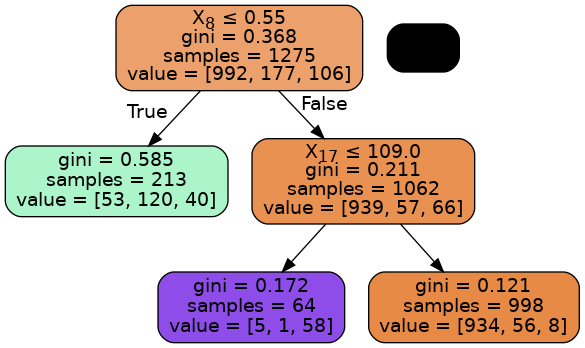

In [7]:
#Display decision tree for first model
utils9.display_tree(model_1)

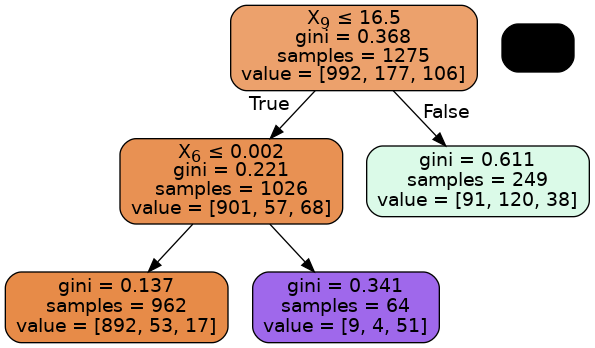

In [8]:
#Display decision tree for second model
utils9.display_tree(model_2)

### Question 4:

Select and justify your final choice of hyperparameters based on the training and validation metrics. Provide a written analysis in markdown.

Based on the comprehensive assessment of training and validation metrics provided in the classification report, **Model 1 (Model Number 10)** emerges as the optimal choice. With a parameter configuration including {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 17, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.15, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}, this model consistently demonstrates superior precision and recall across all classes. Moreover, its performance is reinforced by the detailed examination of the confusion matrix, underscoring its robustness in accurately classifying instances in both the training and validation datasets.